## Final Project Submission

Please fill out:
* Student name: Warren Morelli
* Student pace: part time 
* Scheduled project review date/time: Dec 16
* Instructor name: Hardik
* Blog post URL:


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
df1 = pd.read_csv("zippedData/bom.movie_gross.csv.gz") #gross
df2 = pd.read_csv("zippedData/imdb.title.basics.csv.gz") #run_minutes & genre
df3 = pd.read_csv("zippedData/tmdb.movies.csv.gz") #language
#df4 = pd.read_csv("zippedData/imdb.title.ratings.csv.gz") #rating
#df5 = pd.read_csv("zippedData/tn.movie_budgets.csv.gz") #Bonus production_budget expectation

In [63]:
df1.head() #quik view

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
df2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
df3.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
#drop columns I don't need
df1.drop('studio', inplace=True, axis=1)
df1.drop('year', inplace=True, axis=1)

In [6]:
df1.info() #I need to foreign_gross & domestic_gross to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
dtypes: float64(1), object(2)
memory usage: 79.5+ KB


In [7]:
df1.describe() #there are no extreme values I need to remove

,domestic_gross
count,3.359000e+03
mean,2.874585e+07
std,6.698250e+07
min,1.000000e+02
25%,1.200000e+05
50%,1.400000e+06
75%,2.790000e+07
max,9.367000e+08


In [8]:
df1.info() #looking for number of null values by comparing .info with .isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
dtypes: float64(1), object(2)
memory usage: 79.5+ KB


In [9]:
df1.isna().sum() #looking for number of null values by comparing .info with .isna().sum()

title                0
domestic_gross      28
foreign_gross     1350
dtype: int64

In [10]:
#Change NaN to 0 becase NaN means 0 foreign gross
df1['foreign_gross'] = df1['foreign_gross'].fillna('0')


In [11]:
# I will delete Null rows for domestic_gross because there aren't that many.
df1 = df1.dropna(subset=['domestic_gross'])

In [12]:
#replace the 5 rows with commas

df1[df1['foreign_gross'].str.contains(',')]

df1['foreign_gross'] = df1['foreign_gross'].str.replace(",","")

#double check to make sure it worked
df1[df1['foreign_gross'].str.contains(',')]

,title,domestic_gross,foreign_gross


In [13]:
df1.info()  #double check to make sure it worked

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 0 to 3386
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3359 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   3359 non-null   object 
dtypes: float64(1), object(2)
memory usage: 105.0+ KB


In [14]:
#change foreign_gross to float, then int
df1['foreign_gross'] = df1['foreign_gross'].astype('float')
df1['domestic_gross'] = df1['domestic_gross'].astype('float')

df1['foreign_gross'] = df1['foreign_gross'].astype('int')
df1['domestic_gross'] = df1['domestic_gross'].astype('int')

In [15]:
#check to see if it worked. Success.
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 0 to 3386
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3359 non-null   object
 1   domestic_gross  3359 non-null   int32 
 2   foreign_gross   3359 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 78.7+ KB


In [16]:
#Create a new row with total gross
df1['gross'] = df1['domestic_gross'] + df1['foreign_gross']

#drop 2 rows. I only need total gross.
df1.drop('domestic_gross', inplace=True, axis=1)
df1.drop('foreign_gross', inplace=True, axis=1)

In [17]:
#df1 data cleaning finished

In [18]:
df2 #quick look

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [19]:
#drop columns I don't need 
df2.drop('original_title', inplace=True, axis=1)
df2.drop('start_year', inplace=True, axis=1)

In [56]:
df2.head()

,tconst,title,runtime_minutes,genres
0,tt0063540,Sunghursh,175,Action
1,tt0066787,One Day Before the Rainy Season,114,Biography
2,tt0069049,The Other Side of the Wind,122,Drama
3,tt0069204,Sabse Bada Sukh,87,Comedy
4,tt0100275,The Wandering Soap Opera,80,Comedy


In [21]:
#looking for number of null values by comparing .info with .isna().sum()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   runtime_minutes  114405 non-null  float64
 3   genres           140736 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.5+ MB


In [22]:
#looking for number of null values by comparing .info with .isna().sum()
df2.isna().sum()

tconst                 0
primary_title          0
runtime_minutes    31739
genres              5408
dtype: int64

In [23]:
df2.describe() 
#looking for extreme values
#I thought the movies that ran for 1 minutes or over 10 hours where a mistake, but after checking online, it is correct.

,runtime_minutes
count,114405.000000
mean,86.187247
std,166.360590
min,1.000000
25%,70.000000
50%,87.000000
75%,99.000000
max,51420.000000


In [24]:
#looking for extreme values
#I thought the movies that ran for 1 minutes or over 10 hours where a mistake, but after checking online, it is correct.
df2.loc[df2['runtime_minutes'] < 2].head()

,tconst,primary_title,runtime_minutes,genres
2570,tt10265824,Lamentation For Little Girls Who Are In Love W...,1.0,Animation
3298,tt10326116,Happy New Year,1.0,Animation
22903,tt1935926,Tierra,1.0,"Documentary,Family"
54307,tt3194766,Guerreiros da paz e poesia: It All Depends on Us,1.0,"Documentary,Music"
57140,tt3331660,Shark Sanctuary,1.0,"Adventure,Documentary"


In [25]:
#I will change NaN runtime to median
df2['runtime_minutes'] = df2['runtime_minutes'].fillna(df2['runtime_minutes'].median())

In [26]:
# delete Null genres as it is a small percentage of total data
df2 = df2.dropna(subset=['genres'])

# change heading to title
df2 = df2.rename({'primary_title': 'title'}, axis=1) 

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140736 non-null  object 
 1   title            140736 non-null  object 
 2   runtime_minutes  140736 non-null  float64
 3   genres           140736 non-null  object 
dtypes: float64(1), object(3)
memory usage: 5.4+ MB


In [28]:
#change title name
df2 = df2.rename({'primary_title': 'title'}, axis=1)

#change runtime to int
df2['runtime_minutes'] = df2['runtime_minutes'].astype(int)


In [29]:
#Sort out the genres. The first genre in the list is the most relatable so we will use that.

df2['genres'] = df2['genres'].map(lambda x: str(x).split(',')) #fisrt split the genres

df2['genres'] = df2['genres'].map(lambda x: x[0:1]) #then select the first


#then convert back to string
def listToString(s): 
    str1 = " "
    return (str1.join(s))

df2['genres'] = df2['genres'].map(lambda x: listToString(x))

df2['genres'].unique()


array(['Action', 'Biography', 'Drama', 'Comedy', 'Horror', 'Adventure',
       'Documentary', 'History', 'Animation', 'Crime', 'Sci-Fi',
       'Thriller', 'Fantasy', 'Mystery', 'Musical', 'Family', 'Western',
       'Romance', 'Sport', 'Adult', 'Music', 'News', 'Talk-Show',
       'Reality-TV', 'War', 'Game-Show', 'Short'], dtype=object)

In [30]:
#df2 Data cleaning done

In [31]:
df3.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [32]:
#drop columns I don't need
df3.drop('genre_ids', inplace=True, axis=1)
df3.drop('Unnamed: 0', inplace=True, axis=1)
df3.drop('original_title', inplace=True, axis=1)
df3.drop('id', inplace=True, axis=1)
df3.drop('original_language', inplace=True, axis=1)

In [33]:
df3

,popularity,release_date,title,vote_average,vote_count
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,28.005,1995-11-22,Toy Story,7.9,10174
4,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...
26512,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,0.600,2018-10-01,The Last One,0.0,1
26515,0.600,2018-06-22,Trailer Made,0.0,1


In [34]:
df3.info()  #Dtype look good #No Null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    26517 non-null  float64
 1   release_date  26517 non-null  object 
 2   title         26517 non-null  object 
 3   vote_average  26517 non-null  float64
 4   vote_count    26517 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.0+ MB


In [35]:
df3['release_date']

0        2010-11-19
1        2010-03-26
2        2010-05-07
3        1995-11-22
4        2010-07-16
            ...    
26512    2018-10-13
26513    2018-05-01
26514    2018-10-01
26515    2018-06-22
26516    2018-10-05
Name: release_date, Length: 26517, dtype: object

In [36]:
# change date colum to months
df3['release_month'] = df3['release_date'].str[5:7]

#for some reason the code below kept on crashing jupyter notebook
#df3['release_month'] = df3['release_date'].map(lambda x: df3['release_date'].str[5:7])

df3['release_month'] = df3['release_month'].str.replace("01","jan")
df3['release_month'] = df3['release_month'].str.replace("02","feb")
df3['release_month'] = df3['release_month'].str.replace("03","mar")
df3['release_month'] = df3['release_month'].str.replace("04","apr")
df3['release_month'] = df3['release_month'].str.replace("05","may")
df3['release_month'] = df3['release_month'].str.replace("06","jun")
df3['release_month'] = df3['release_month'].str.replace("07","jul")
df3['release_month'] = df3['release_month'].str.replace("08","aug")
df3['release_month'] = df3['release_month'].str.replace("09","sep")
df3['release_month'] = df3['release_month'].str.replace("10","oct")
df3['release_month'] = df3['release_month'].str.replace("11","nov")
df3['release_month'] = df3['release_month'].str.replace("12","dec")

df3.drop('release_date', inplace=True, axis=1)

In [37]:
df3.head()

,popularity,title,vote_average,vote_count,release_month
0,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,nov
1,28.734,How to Train Your Dragon,7.7,7610,mar
2,28.515,Iron Man 2,6.8,12368,may
3,28.005,Toy Story,7.9,10174,nov
4,27.920,Inception,8.3,22186,jul


In [38]:
#df3 data cleaning finished

In [39]:
df1.head(1)

,title,gross
0,Toy Story 3,1067000000


In [40]:
df2.head(1)

,tconst,title,runtime_minutes,genres
0,tt0063540,Sunghursh,175,Action


In [41]:
df3.head(1)

,popularity,title,vote_average,vote_count,release_month
0,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,nov


In [42]:
#create table to compare genres, runtime & month to gross revenue as this is the main factor
#I will only create one table at a time as too lose as little data as possile, rather than joining all 3
df_genres_runtime = pd.merge(df1, df2, how="inner", indicator=True)
df_month = pd.merge(df1, df3, how="inner", indicator=True)

In [43]:
#Create a df grouped by genres and showing mean values to determain which genre made the highest revenue
df_genres_mean = df_genres_runtime.groupby(by='genres').mean()
df_genres_mean = df_genres_mean.reset_index()
df_genres_mean.head()

,genres,gross,runtime_minutes
0,Action,1.632312e+08,114.493921
1,Adventure,2.074807e+08,102.211009
2,Animation,9.606703e+07,90.097561
3,Biography,4.195366e+07,106.838235
4,Comedy,3.947384e+07,104.243451


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


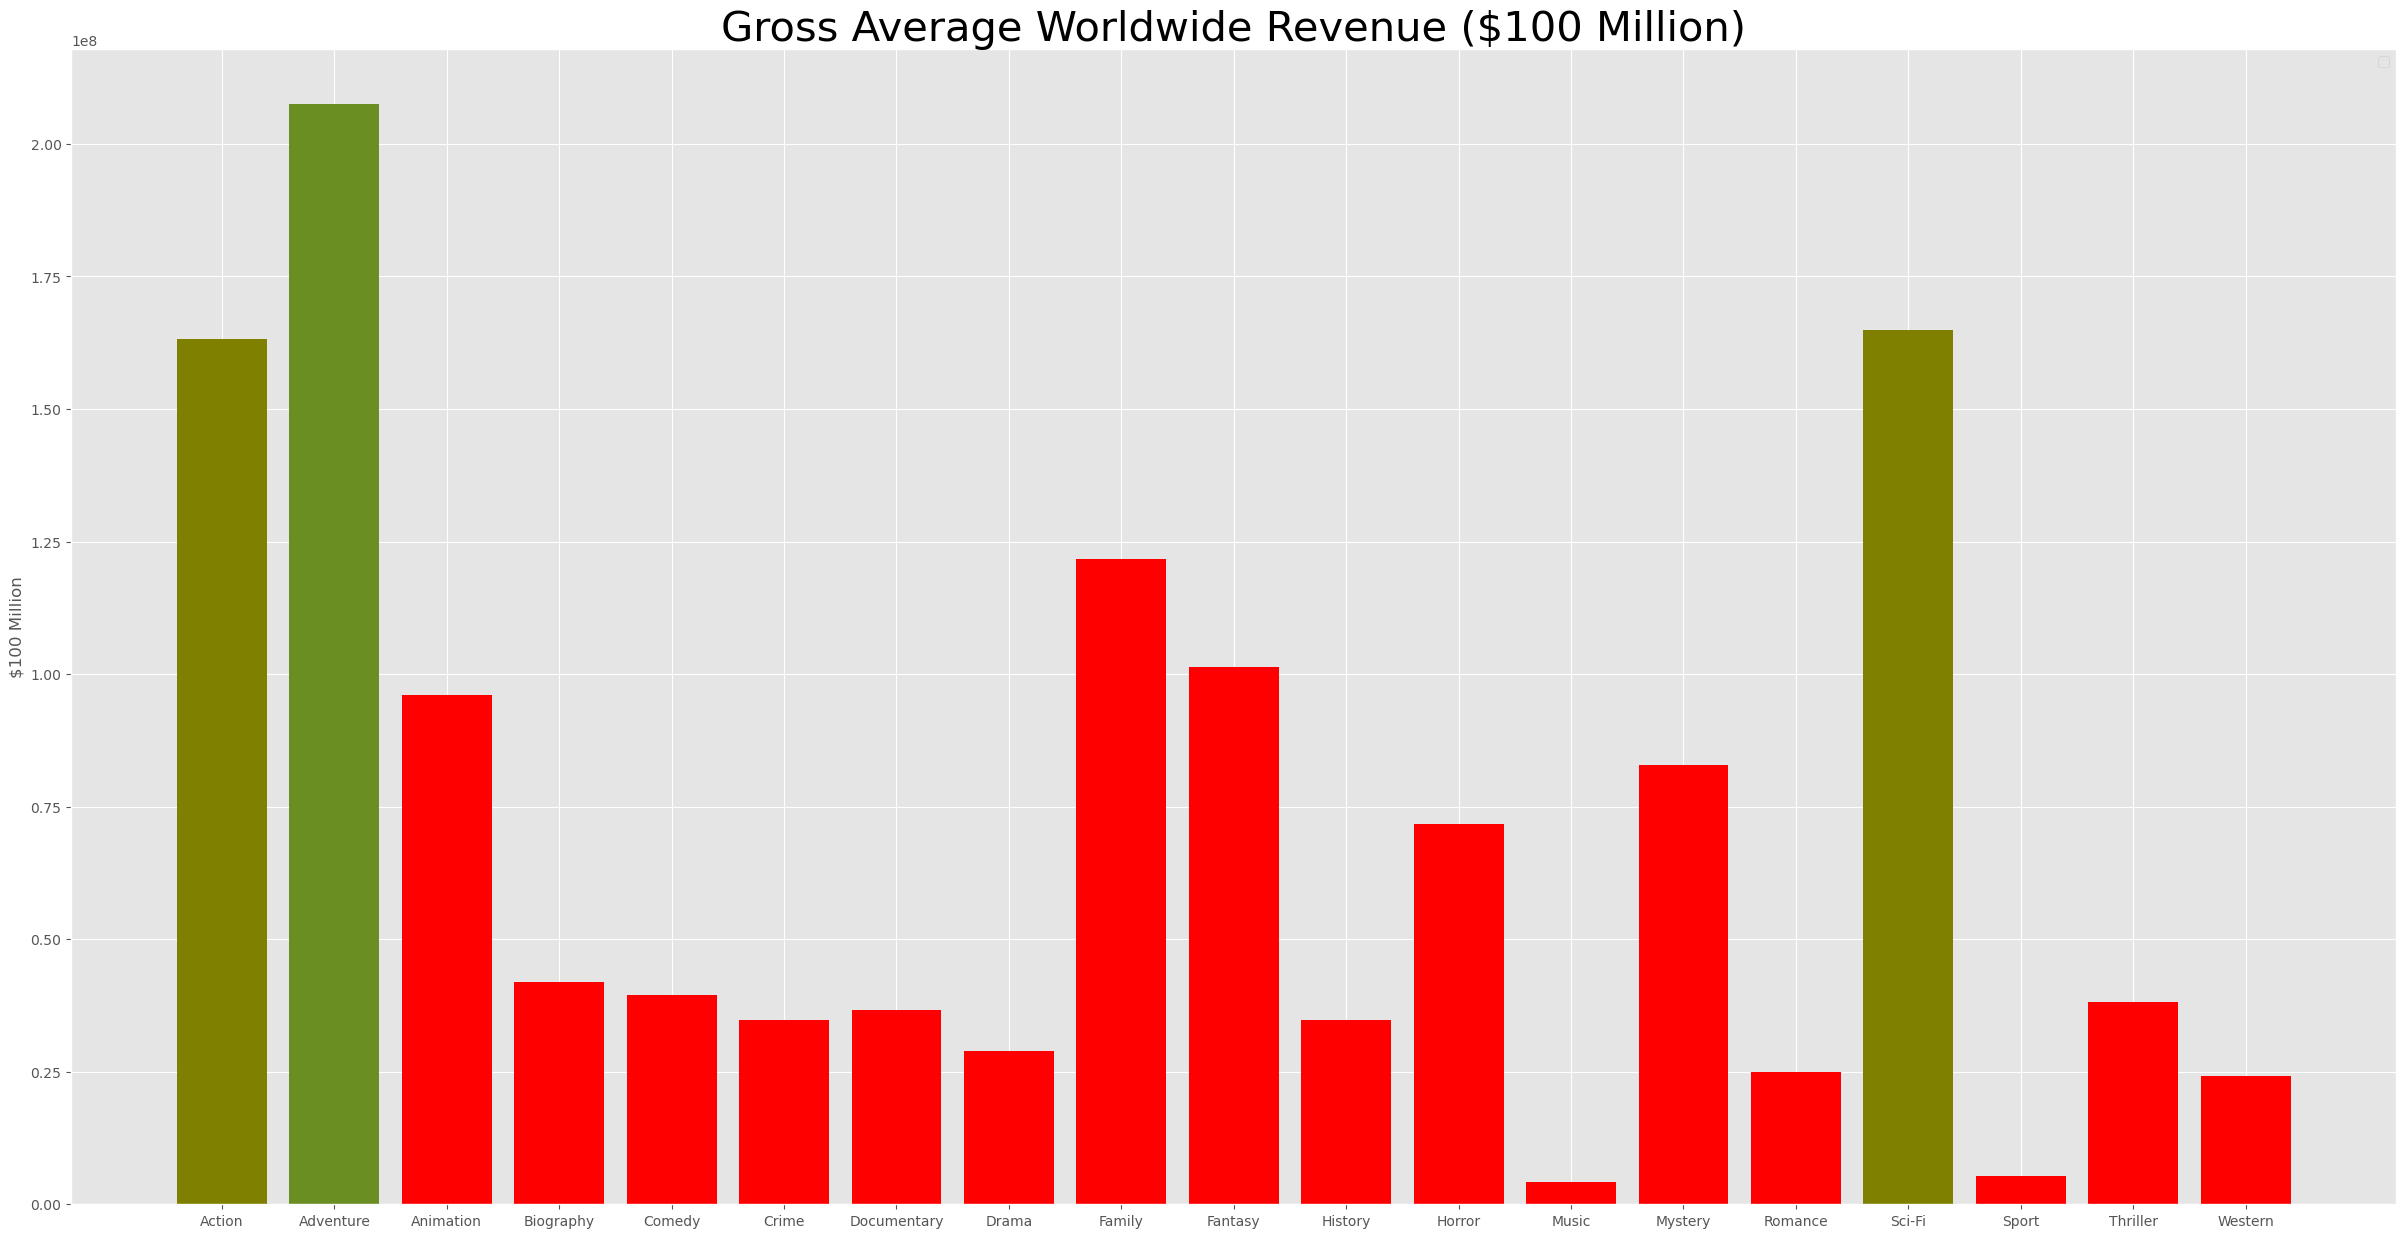

In [44]:
#show findings in a bar graph
plt.figure(figsize=(30,15))

x=df_genres_mean['genres']
y=df_genres_mean['gross']

# Use the bar() function to create a plot using the above values of x and y. Add a label.
plt.bar(x, y, color=['olive', 'olivedrab', 'red', 'red', 'red','red', 'red', 'red', 'red', 'red','red','red', 'red', 'red', 'red', 'olive', 'red', 'red', 'red'],)

#plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])


plt.ylabel('$100 Million')

plt.title('Gross Average Worldwide Revenue ($100 Million)', fontsize=30)
plt.legend()

# Output the final plot
plt.show()


In [45]:
#create a group by runtime average so I can compare runtime to gross revenue
df_runtime_mean = df_genres_runtime.groupby(by='runtime_minutes').mean()
df_runtime_mean = df_runtime_mean.reset_index()
df_runtime_mean

,runtime_minutes,gross
0,2,177000.0
1,3,91750000.0
2,4,101200000.0
3,5,25328250.0
4,6,5344000.0
...,...,...
156,186,1600000.0
157,189,1300000.0
158,192,1072000.0
159,272,125900.0


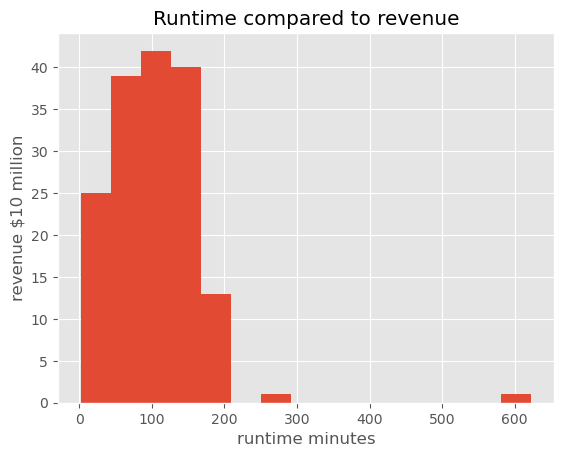

In [47]:
#create histogram to read data
x = df_runtime_mean['runtime_minutes']
fig, ax = plt.subplots()
ax.hist(x, bins=15)
ax.set_xlabel("runtime minutes")
ax.set_ylabel("revenue $10 million")
ax.set_title("Runtime compared to revenue");

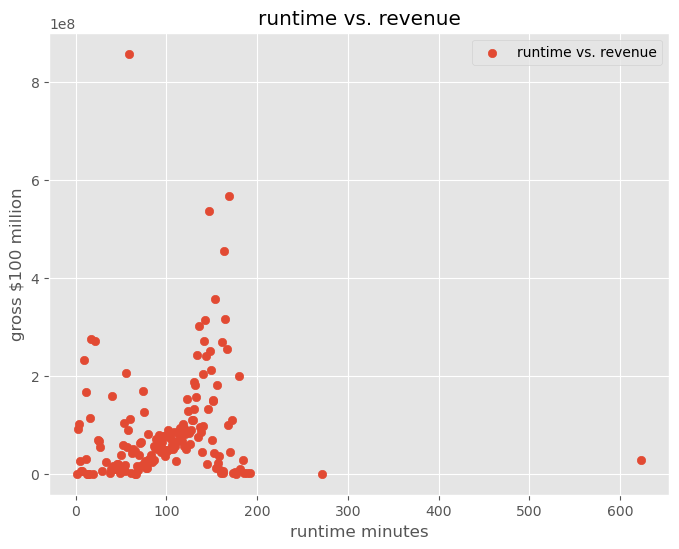

In [57]:
#back it up with a scatter plot
q = df_runtime_mean['runtime_minutes']
w = df_runtime_mean['gross']

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(q, w)
ax.set_xlabel("runtime minutes")
ax.set_ylabel("gross $100 million")
ax.legend(["runtime vs. revenue"])
ax.set_title("runtime vs. revenue");

In [49]:

df_month = df_month.groupby(by='release_month').mean()
df_month = df_month.reset_index()
df_month['gross'] = df_month['gross'].map(lambda x: x/1000)

df_month = df_month.reindex([4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2])
df_month

,release_month,gross,popularity,vote_average,vote_count
4,jan,60466.778595,8.405561,6.125434,701.341040
3,feb,93593.732503,10.153405,6.357055,1313.748466
7,mar,65984.291808,9.089231,6.456731,1179.524038
0,apr,46800.308394,8.694455,6.361905,876.805195
8,may,117793.013351,9.788010,6.476733,1597.178218
6,jun,132867.282512,9.937820,6.389756,1605.356098
5,jul,132751.178620,10.947724,6.380208,1835.729167
1,aug,62998.269652,10.044577,6.364179,1059.124378
11,sep,55469.040579,8.708583,6.350000,948.500000
10,oct,47587.344792,9.711771,6.418750,1131.194444


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


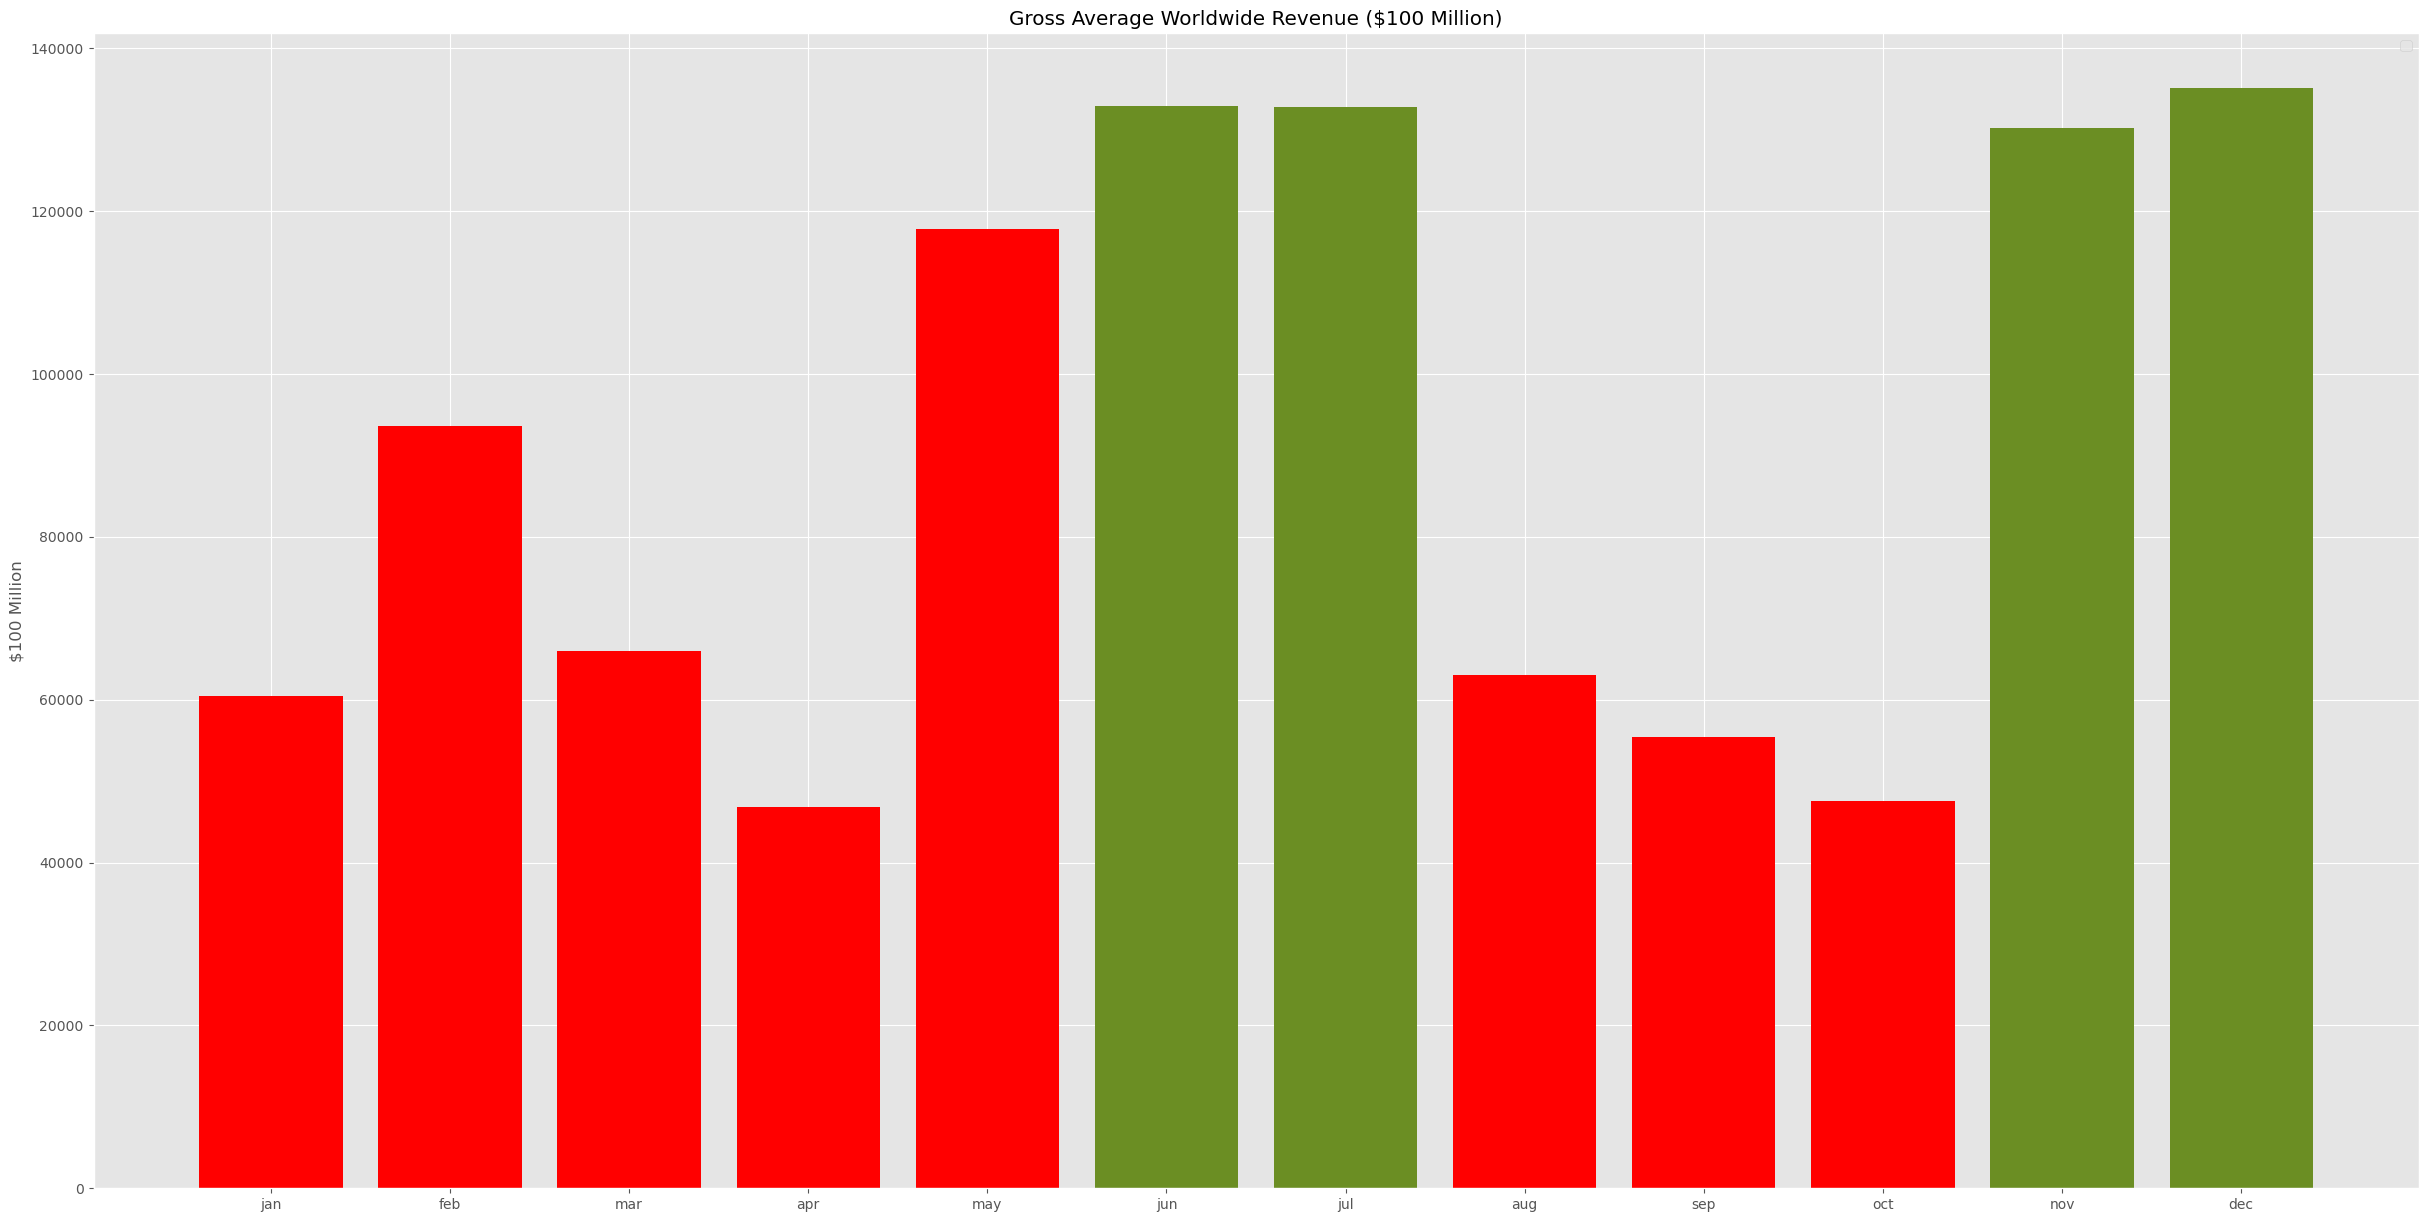

In [50]:
#show findings in a bar graph
plt.figure(figsize=(30,15))

x=df_month['release_month']
y=df_month['gross']

# Use the bar() function to create a plot using the above values of x and y. Add a label.
plt.bar(x, y, color=['red', 'red', 'red', 'red', 'red','olivedrab', 'olivedrab', 'red', 'red','red', 'olivedrab', 'olivedrab'])



plt.ylabel('$100 Million')

plt.title('Gross Average Worldwide Revenue ($100 Million)')
plt.legend()

# Output the final plot
plt.show()


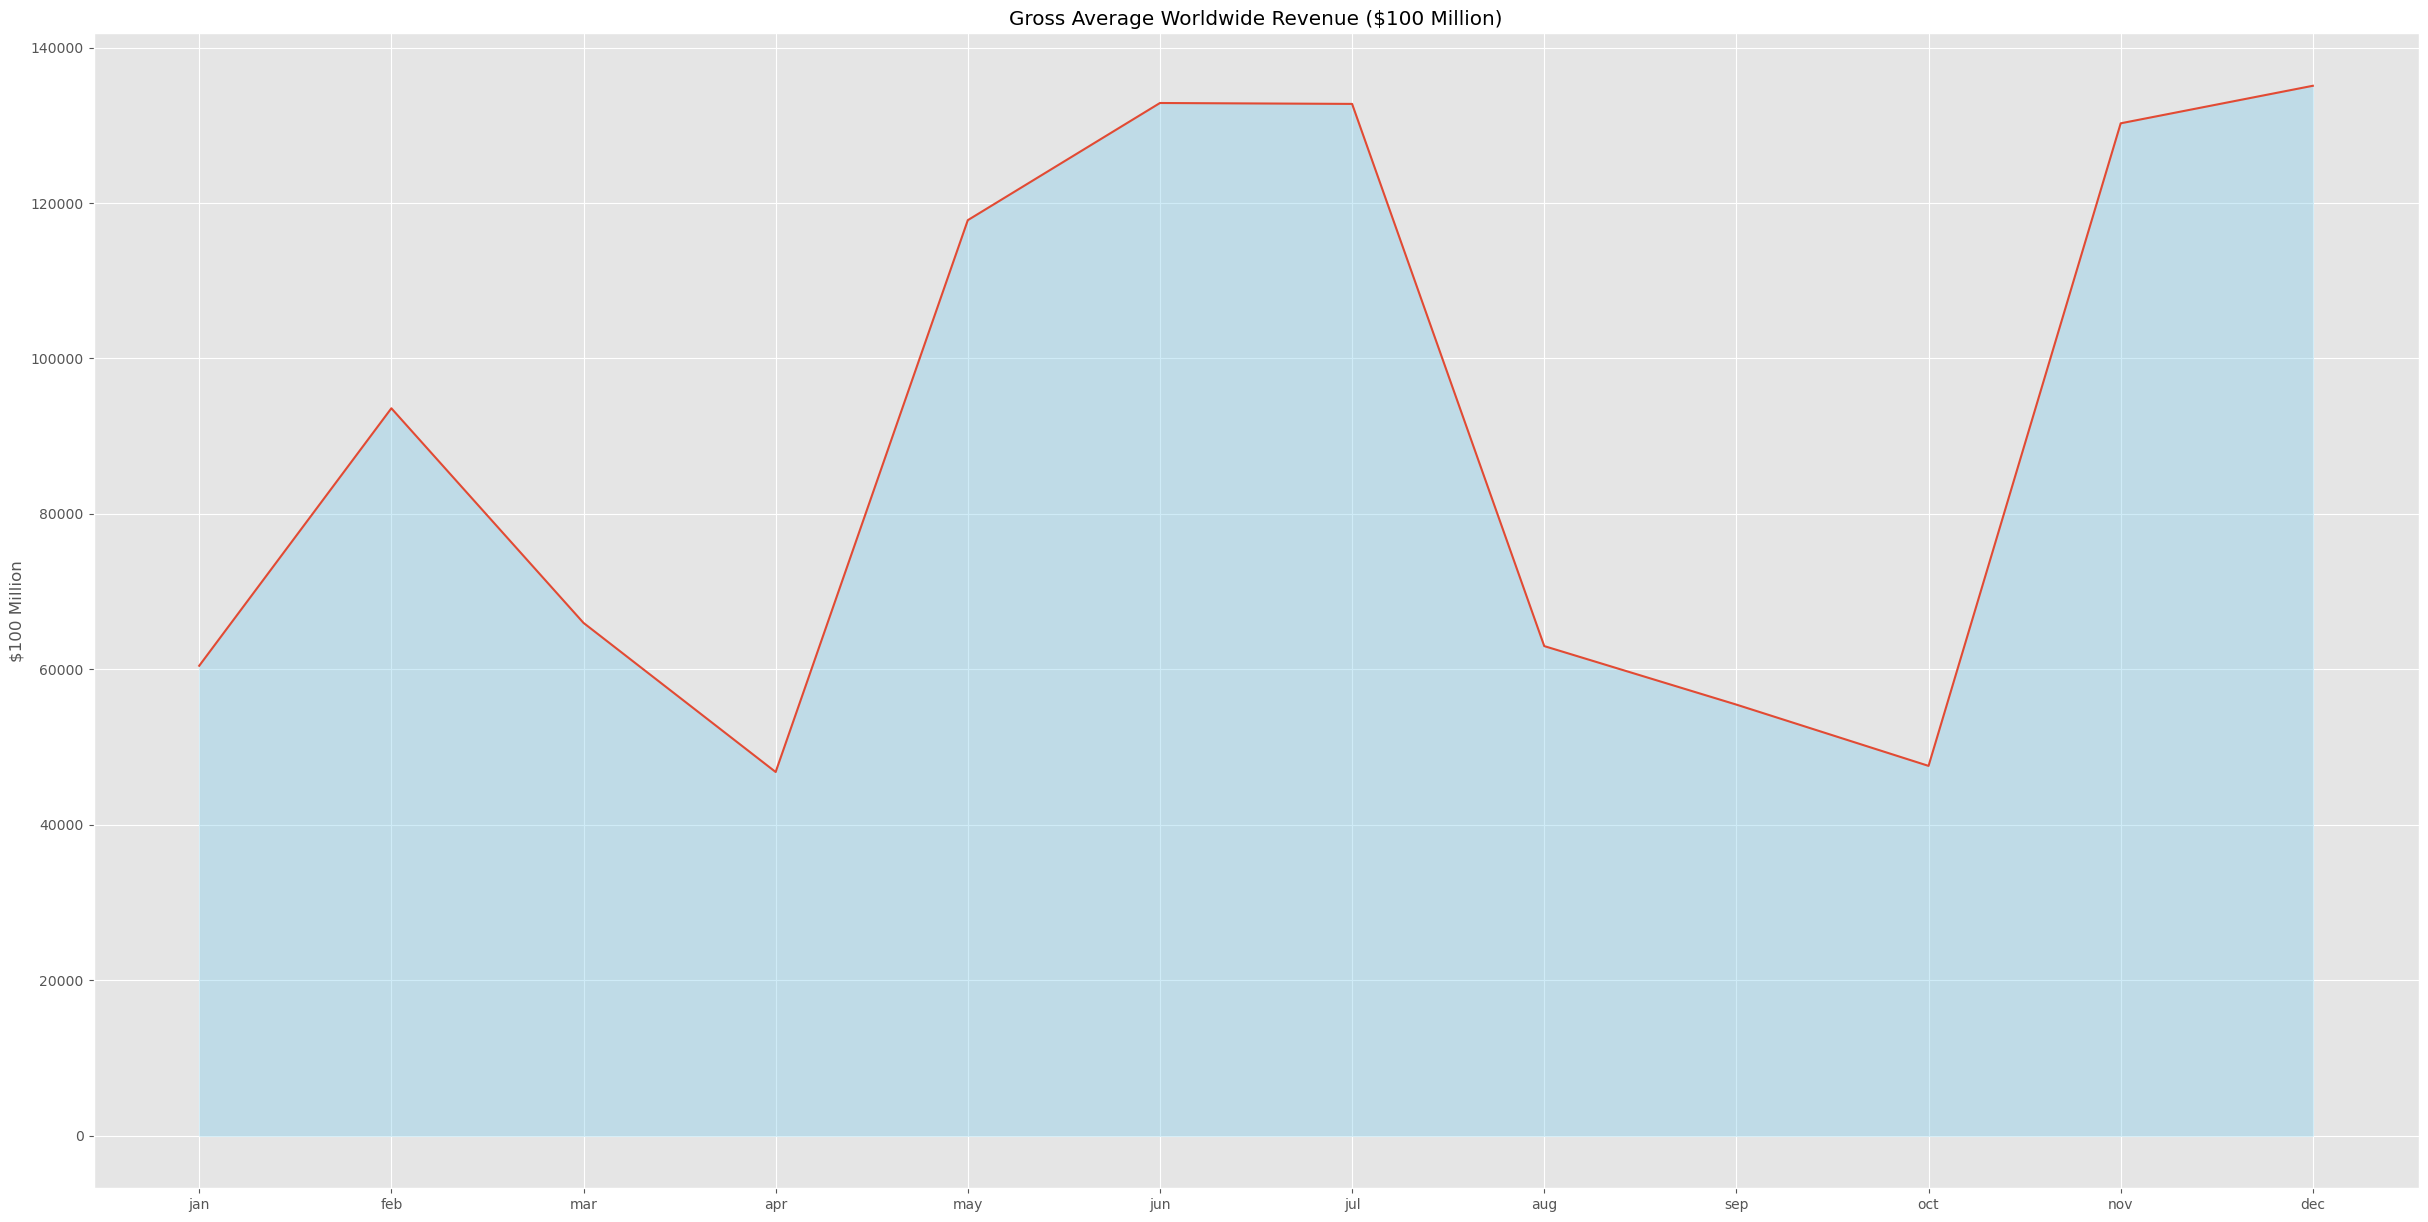

In [52]:

x=df_month['release_month']
y=df_month['gross']


#plt.ylabel('$100 Million')

#plt.title('Gross Average Worldwide Revenue ($100 Million)')

plt.figure(figsize=(30,15))
plt.plot(x, y)
plt.ylabel('$100 Million')
plt.title('Gross Average Worldwide Revenue ($100 Million)')
plt.fill_between( x, y, color="skyblue", alpha=0.4)

